In [1]:
import pipeline
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)  

In [2]:
# Read the config file
cfg = pipeline.read_config('config.yaml')

Successfully loaded!


In [3]:
cfg['datafile']

'data/projects_2012_2013.csv'

## 1. Read Data

In [4]:
df = pipeline.read_data(cfg['datafile'])

############################################################

Load Successful!
Data Shape: (124976, 25)

Descritive Statistics:

       school_ncesid  school_latitude  school_longitude  \
count  1.157430e+05   124976.000000    124976.000000      
mean   2.448448e+11   36.827284       -95.859299          
std    1.644728e+11   4.963669         18.392876          
min    1.000050e+10   18.249140       -171.690554         
25%    6.344101e+10   33.872504       -117.806418         
50%    2.200870e+11   36.617410       -90.101563          
75%    3.704880e+11   40.676156       -80.713740          
max    6.100010e+11   65.672562       -66.628036          

       total_price_including_optional_support  students_reached  
count  124976.000000                           124917.000000     
mean   654.011811                              95.445760         
std    1098.015854                             163.481912        
min    92.000000                               1.000000          
25%    34

In [5]:
df.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
projectid,,,,,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,f,f,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,f,f,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,f,f,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


## Explore Data

/home/siyoungbyun/anaconda3/envs/donorsml/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

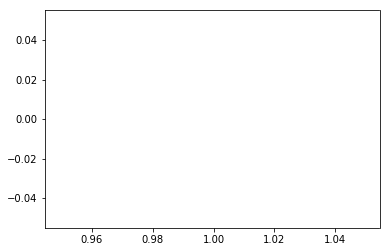

In [6]:
pipeline.visualize_cont_var_dist(df, ['students_reached'])

In [7]:
miss_vars = pipeline.find_var_with_missing_values(df)

                           NaN  Percent of NaN
secondary_focus_subject  40556  32.45         
secondary_focus_area     40556  32.45         
school_metro             15224  12.18         
school_ncesid            9233   7.39          
school_district          172    0.14          
students_reached         59     0.05          
resource_type            17     0.01          
primary_focus_subject    15     0.01          
primary_focus_area       15     0.01          
grade_level              3      0.00          

The following variables have missing values: ['secondary_focus_subject', 'secondary_focus_area', 'school_metro', 'school_ncesid', 'school_district', 'students_reached', 'resource_type', 'primary_focus_subject', 'primary_focus_area', 'grade_level']

- secondary_focus_subject has 40556 missing values, which are 32.45% of the entire data

- secondary_focus_area has 40556 missing values, which are 32.45% of the entire data

- school_metro has 15224 missing values, which are 12.18% 